> # -  Logistic Regression Algorithm with Python

- En este micro-proyecto implementaremos un Algoritmo de Regresión Logistica, y luego crearemos un modelo para una compañia de Telecomunicaciones para predecir cuando los clientes podrian dejar los servicios de la empresa por un competidor, asi que la empresa puede tomar algunas acciones para retener a los clientes.



> ## - Customer churn con Regresion Logistica

- Una Compañia de Telecomunicaciones esta preocupada sobre el numero de clientes saliendo de sus servicios de telefonia fija por competidores de cable. Elos necesitan conocer quien esta dejando los servicios y porque.  

> ## - Primeramente importamos las librerias requeridas:

In [1]:
import pandas as pd
import pylab as pl
import numpy as np
import scipy.optimize as opt
from sklearn import preprocessing
%matplotlib inline
import matplotlib.pyplot as plt

> ## - Sobre el Dataset

Usaremos el dataset de Telecomunicaciones para predecir la pérdida de clientes. Este dataset contiene registros historicos de los clientes donde cada fila representa un Cliente. Los datos son relativamente faciles de entender. 

Typicamente es menos costoso mantener clientes que adquirir nuevos clientes, asi que el enfoque de este analisis es la prediccion de clientes que permaneceran con la compañia.

Este conjunto de datos provee informacion para ayudar a predecir que comportamiento a la retencion de clientes. 

El dataset incluye informacion sobre: 

- Clientes que se fueron el ultimo mes - La columna es llamada **Churn**
- Servicios que cada cliente se ha registrado para - phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies.
- Informacion de cuentas de clientes - Cuanto tiempo habian sido clientes, contrato, metodo de pago, facturacion electronica, cargos mensuales y cargos totales.
- Informacion Demografica sobre los clientes - Gender, age range, and if they have partners and dependents.

> ## - Carga de datos desde CSV File

In [24]:
churn_df = pd.read_csv("ChurnData.csv")
churn_df.head()

,tenure,age,address,income,ed,employ,equip,callcard,wireless,longmon,...,pager,internet,callwait,confer,ebill,loglong,logtoll,lninc,custcat,churn
0,11.0,33.0,7.0,136.0,5.0,5.0,0.0,1.0,1.0,4.40,...,1.0,0.0,1.0,1.0,0.0,1.482,3.033,4.913,4.0,1.0
1,33.0,33.0,12.0,33.0,2.0,0.0,0.0,0.0,0.0,9.45,...,0.0,0.0,0.0,0.0,0.0,2.246,3.240,3.497,1.0,1.0
2,23.0,30.0,9.0,30.0,1.0,2.0,0.0,0.0,0.0,6.30,...,0.0,0.0,0.0,1.0,0.0,1.841,3.240,3.401,3.0,0.0
3,38.0,35.0,5.0,76.0,2.0,10.0,1.0,1.0,1.0,6.05,...,1.0,1.0,1.0,1.0,1.0,1.800,3.807,4.331,4.0,0.0
4,7.0,35.0,14.0,80.0,2.0,15.0,0.0,1.0,0.0,7.10,...,0.0,0.0,1.0,1.0,0.0,1.960,3.091,4.382,3.0,0.0


> ## - Pre-procesamiento de datos y Selección

- Vamos a seleccionar algunas caracteristicas para el modelado. Tambien cambiaremos el tipo de dato *Objetivo* para ser *integer*, ya que es un requisito para el algoritmo sklearn:

In [25]:
churn_df = churn_df[['tenure', 'age', 'address', 'income', 'ed', 'employ', 'equip',   'callcard', 'wireless','churn']]
churn_df['churn'] = churn_df['churn'].astype('int')
churn_df.head()

,tenure,age,address,income,ed,employ,equip,callcard,wireless,churn
0,11.0,33.0,7.0,136.0,5.0,5.0,0.0,1.0,1.0,1
1,33.0,33.0,12.0,33.0,2.0,0.0,0.0,0.0,0.0,1
2,23.0,30.0,9.0,30.0,1.0,2.0,0.0,0.0,0.0,0
3,38.0,35.0,5.0,76.0,2.0,10.0,1.0,1.0,1.0,0
4,7.0,35.0,14.0,80.0,2.0,15.0,0.0,1.0,0.0,0


- Veamos cuantas filas y columnas estan en este dataset en total

In [26]:
churn_df.shape

(200, 10)

- Vamos a definir **X** y **y** para nuestro dataset

In [27]:
X = np.asarray(churn_df[['tenure', 'age', 'address', 'income', 'ed', 'employ', 'equip']])
X[0:5]

array([[ 11.,  33.,   7., 136.,   5.,   5.,   0.],
       [ 33.,  33.,  12.,  33.,   2.,   0.,   0.],
       [ 23.,  30.,   9.,  30.,   1.,   2.,   0.],
       [ 38.,  35.,   5.,  76.,   2.,  10.,   1.],
       [  7.,  35.,  14.,  80.,   2.,  15.,   0.]])

In [28]:
y = np.asarray(churn_df['churn'])
y[0:5]

array([1, 1, 0, 0, 0])

- Ademas, normalizamos el Dataset

In [29]:
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X)
X[0:7]

array([[-1.14, -0.63, -0.46,  0.48,  1.7 , -0.58, -0.86],
       [-0.12, -0.63,  0.03, -0.33, -0.64, -1.14, -0.86],
       [-0.58, -0.86, -0.26, -0.35, -1.42, -0.92, -0.86],
       [ 0.12, -0.47, -0.66,  0.01, -0.64, -0.03,  1.16],
       [-1.32, -0.47,  0.23,  0.04, -0.64,  0.53, -0.86],
       [ 1.51,  0.83,  0.53,  0.35, -1.42,  1.54, -0.86],
       [ 0.3 , -0.09, -0.46, -0.3 , -0.64, -0.25,  1.16]])

> ## - Train/Test dataset

- Dividimos nuestro dataset en train y test set

In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print('Train set: ', X_train.shape, y_train.shape)
print('Test set', X_test.shape, y_test.shape)

Train set:  (160, 7) (160,)
Test set (40, 7) (40,)


> ## - Modelado (Regresión Logistica con Scikit-learn)

Vamos a construir nuestro modelo usando **LogisticRegression** desde el paquete Scikit-learn. Esta funcion implementa una Regresion Logistica y puede usar diferentes optimizadores numericos para encontrar los parametros, incluyendo solucionadores'newton-cg', 'ibfgs', 'liblinear', 'sag', 'saga'.

La version de Regresion Logistica en Scikit-learn, soporta Regularizacion. La regularizacion es una tecnica usada para resolver el problema de **overfitting** en modelos de Machine Learning. 

In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
LR

LogisticRegression(C=0.01, solver='liblinear')

- Ahora podemos predecir usando nuestro test set:

In [32]:
yhat = LR.predict(X_test)
yhat

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0])

**predict_proba** retorna estimaciones para todas las clases, ordenados por la etiqueta de clases, asi que la primera columna es la probabilidad de clase 1, P(Y=1|X), y la segunda columna es la probabilidad de clase 0, P(Y=0|X):

In [33]:
yhat_prob = LR.predict_proba(X_test)
yhat_prob

array([[0.54, 0.46],
       [0.61, 0.39],
       [0.56, 0.44],
       [0.63, 0.37],
       [0.56, 0.44],
       [0.55, 0.45],
       [0.52, 0.48],
       [0.61, 0.39],
       [0.41, 0.59],
       [0.63, 0.37],
       [0.58, 0.42],
       [0.63, 0.37],
       [0.48, 0.52],
       [0.43, 0.57],
       [0.66, 0.34],
       [0.55, 0.45],
       [0.52, 0.48],
       [0.49, 0.51],
       [0.49, 0.51],
       [0.52, 0.48],
       [0.62, 0.38],
       [0.53, 0.47],
       [0.64, 0.36],
       [0.52, 0.48],
       [0.51, 0.49],
       [0.71, 0.29],
       [0.55, 0.45],
       [0.52, 0.48],
       [0.52, 0.48],
       [0.71, 0.29],
       [0.68, 0.32],
       [0.51, 0.49],
       [0.42, 0.58],
       [0.71, 0.29],
       [0.6 , 0.4 ],
       [0.64, 0.36],
       [0.4 , 0.6 ],
       [0.52, 0.48],
       [0.66, 0.34],
       [0.51, 0.49]])

> ## - Evaluación

### jaccard index

Probaremos jaccard index para la evaluacion de precision, podemos definir jaccard como el tamaño de la interseccion dividida pr el tamaño de la union de 2 conjunto de etiquetas. 

In [34]:
from sklearn.metrics import jaccard_score 
jaccard_score(y_test, yhat, average=None)

array([0.71, 0.38])

> ## - Matriz de Confusion

- Otra forma de ver la Precision de un clasificador es mirar una **Confusion Matrix**

In [35]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print(confusion_matrix(y_test, yhat, labels=[1,0]))

[[ 6  9]
 [ 1 24]]


Confusion matrix, without normalization
[[ 6  9]
 [ 1 24]]


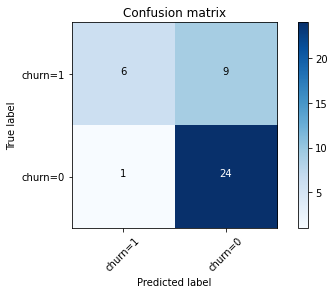

In [36]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat, labels=[1,0])
np.set_printoptions(precision=2)

#Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['churn=1','churn=0'],normalize= False,  title='Confusion matrix')

- Veamos la primera fila. La primera fila es para clientes cuyo valor real de churn en el *test set* es 1. Como se puede calcular, fuera de los 40 clientes, el valor real de churn de 15 de ellos es 1. Y fuera de estos 15, el clasificador predijo correctamente 6 de ellos como 1, y 9 de ellos como 0.

- Esto significa, que para 6 clientes, el valor real de churn fue 1 en el *test set*, y el clasificador tambien predijo correctamente estos como 1. Sin embargo, mientras la etiqueta actual de 9 clientes fue 1, el clasificador predijo estos como 0, lo cual no es muy bueno. Podemos considerar esto como error del modelo para la primera fila.

- Que hay sobre los clientes con valor de churn de 0? Veamos la segunda fila. parece que hubo 25 clientes cuyo valor de churn fue 0.

- El clasificador predijo correctamente 24 de ellos como 0, y uno de ellos incorrectamente como 1. Asi que ha hecho un buen trabajo en las predicciones de clientes con valor de churn 0. Algo bueno de la matriz de confusion es que muestra las habilidades del modelo para correctamente predecir o separar las clases. En casos especificos de clasificacion binaria, como en este ejemplo que podemos interpretar estos numeros como un contador de *true positives, false positives, true negatives, y false negatives*. 

In [37]:
print(classification_report(y_test, yhat))

              precision    recall  f1-score   support

           0       0.73      0.96      0.83        25
           1       0.86      0.40      0.55        15

    accuracy                           0.75        40
   macro avg       0.79      0.68      0.69        40
weighted avg       0.78      0.75      0.72        40



Basado en el recuento de cada seccion, podemos calcular la precision y el recall de cada etiqueta:

- **Precision** es una medida de la accuracy siempre que una etiqueta de clase ha sido predecida. Esto es definido por:
    precision = TP/(TP + FP)
    
- **Recall** Es la tasa de *true positive*. Esto es definido como:
    Recall = TP / (TP + FN)
    
Asi es que podemos calcular la *precision* y el *recall* de cada clase.

- **F1-score**: Ahora estamos en posicion de calcular el F1 scores para cada etiqueta basada en la *precision* y el  *recall* de esa etiqueta.

El F1-score es un promedio armonico de la precision y el recall, donde un F1-score alcanza el mejor valor de 1 (precision y recall perfecto) y el peor como 0. Esta es un buena forma de mostrar que un clasificador tiene un buen valor para ambos *precision* y  *recall*.

Y finalmente, podemos ecir el promedio de la precision para este clasificador es el promedio de el F1-score para abmas etiquetas, el cual es **0.72** en nuestro caso. 


> ## - Log Loss

Ahora, veamos el **log loss** para la evaluacion. En Regresion Logistica la salida puede ser la probabilidad de cliente churn es YES (o igual a 1). Esta probabilidad es un valor entre 0 y 1. Log Loss( Pérdida Logaritmica) mide el rendimiento de un clasificador donde la salida predecida es una probabilidad de valor entre 0 y 1.

In [38]:
from sklearn.metrics import log_loss
log_loss(y_test, yhat_prob)

0.6017092478101185

> ## - Practica

Como una practica construiremos un modelo de Regresion Logistica de nuevo para el mismo dataset, pero esta ves, usamos diferente __solver__ y __regularization__values y mostramos un nuevo valor log loss

In [39]:
LR2 = LogisticRegression(C=0.01, solver='sag').fit(X_train,y_train)
yhat_prob2 = LR2.predict_proba(X_test)
print ("LogLoss: : %.2f" % log_loss(y_test, yhat_prob2))

LogLoss: : 0.61


- Esto finaliza la construcción de un modelo de Regresion Logistica para un determinado ejemplo de dataset